In [1]:
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def one_max(vec):
    return vec.sum(axis=1) / vec.shape[1]

def deceptive_one_max(vec):
    best = vec.shape[1] + 1
    if np.all(vec == 0):
        return best
    return vec.sum(axis=1) / best

In [54]:
def pbil(f, vec_size=10, prop_mut=0.1, pop_size=100, iterations=100):
    propability_vector = np.ones(vec_size) * 0.5
    best_scores_history = []
    propabilities_vector_history = []
    for i in range(iterations):
        new_population = (np.random.rand(pop_size, vec_size) < propability_vector).astype(np.int64)

        pop_score = f(new_population)
        best = new_population[np.argmax(pop_score)]
        worst = new_population[np.argmin(pop_score)]
#         history 
        best_scores_history.append(pop_score.max())
        propabilities_vector_history.append(propability_vector.copy())
    #     updates
        propability_vector += best * (2 * prop_mut) - prop_mut
        propability_vector -= worst * (2 * prop_mut) - prop_mut
        propability_vector =  np.clip(propability_vector, 0, 1)
    
    
    return f(best[np.newaxis, :])[0], best_scores_history,propabilities_vector_history, best, propability_vector

def draw_plots(scores_history, props_history, problem_title=None):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,4))
    if problem_title:
        fig.suptitle(problem_title, fontsize=20)
    ax1.plot(np.arange(len(scores_history)), scores_history)
    ax1.set_xlabel('Iteration')
    ax1.set_ylabel('Score')
    ax1.set_title('Progress')

    
    for x in np.array(props_history).T:
        ax2.plot(np.arange(x.size), x)
        ax2.set_title('Propabilities')
        ax2.set_xlabel('Iteration')
        ax2.set_ylabel('Propability')
    plt.show()
    

In [63]:
args = [
    {
        'f': one_max,
        'vec_size': 100,
        'iterations': 100,
        'prop_mut': 0.05,
    },
    {
        'f': deceptive_one_max,
        'vec_size': 100,
        'iterations': 100,
        'prop_mut': 0.05,
    },
]


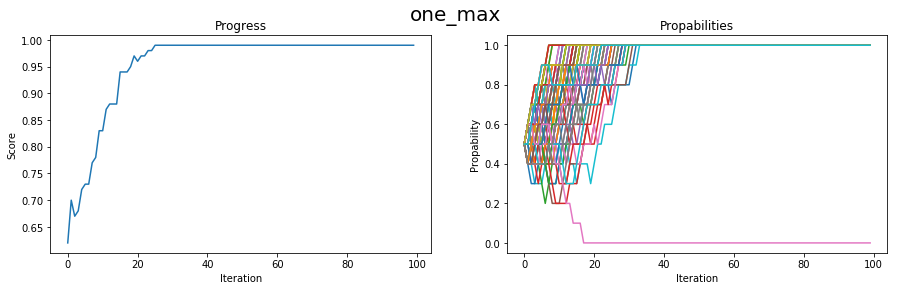

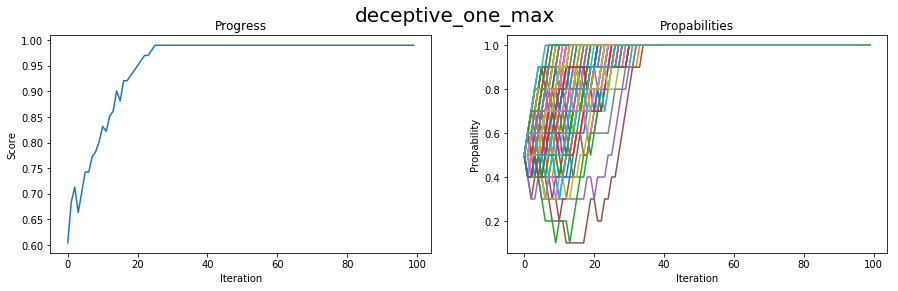

In [64]:
for x in args:
    res = pbil(**x)
    draw_plots(res[1], res[2], x['f'].__name__)